# Load Basic Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Load Data

In [2]:
# Load the .xlsx file
df = pd.read_excel(
    "./data/Smart Scheduling Challenge Data.xlsx",
    index_col=None,
    usecols=["datetime", "orders", "management", "back-of-house", "front-of-house"],
)
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

                     orders  management  back-of-house  front-of-house
datetime                                                              
2024-01-01 00:00:00       0         0.0            0.0             0.0
2024-01-01 01:00:00       0         0.0            0.0             0.0
2024-01-01 02:00:00       0         0.0            0.0             0.0
2024-01-01 03:00:00       0         0.0            0.0             0.0
2024-01-01 04:00:00       0         0.0            0.0             0.0


# Visualize Data

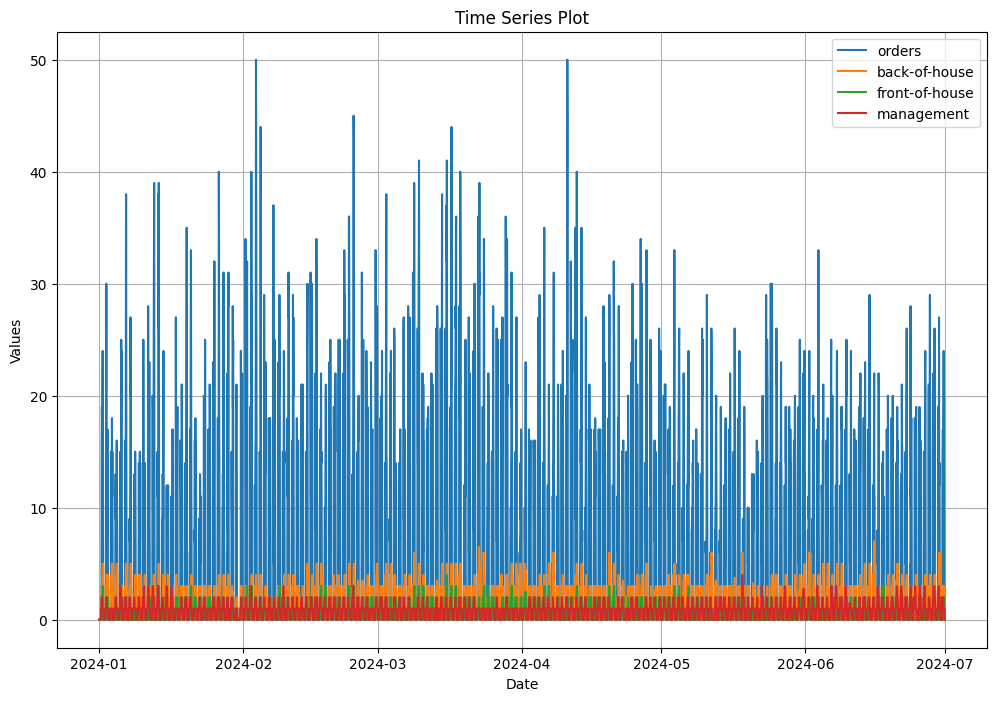

In [3]:
# Create a new figure
plt.figure(figsize=(12, 8))

# Plot each column against the datetime
plt.plot(df["orders"], label="orders")
plt.plot(df["back-of-house"], label="back-of-house")
plt.plot(df["front-of-house"], label="front-of-house")
plt.plot(df["management"], label="management")

# Customize the plot
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()  # Automatically add a legend based on labels
plt.grid(True)

# Show the plot
plt.show()

# Time Series Decomposition & Autocorrelation

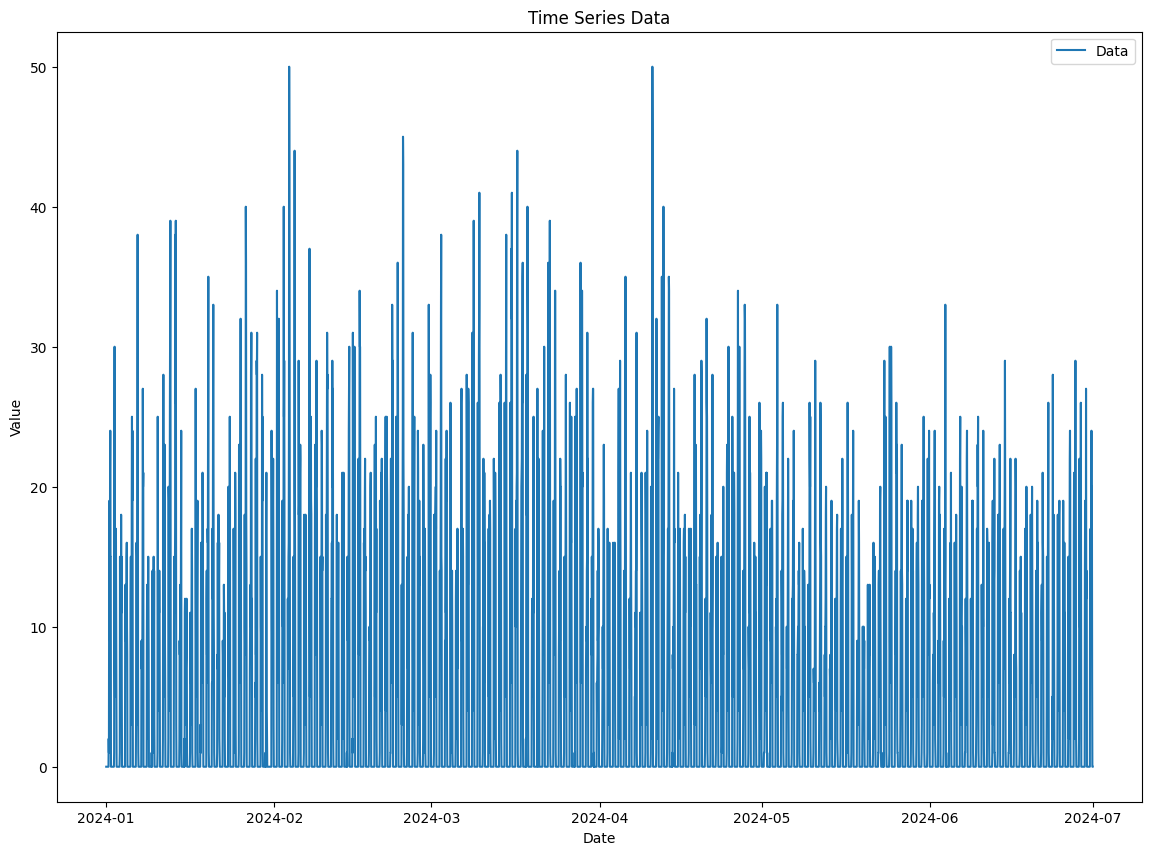

<Figure size 1400x1000 with 0 Axes>

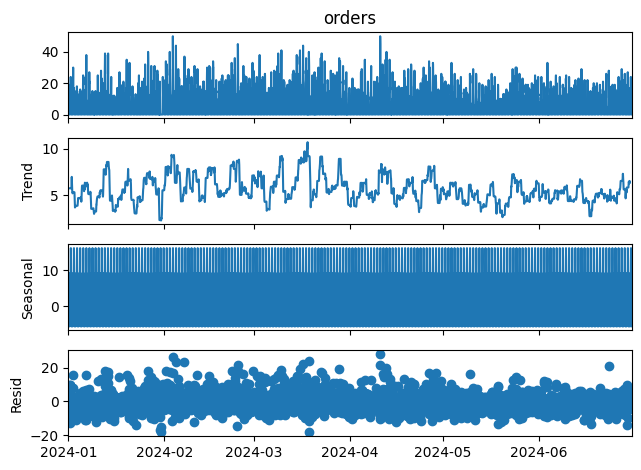

The best lag for seasonality is: 24


<Figure size 1400x1000 with 0 Axes>

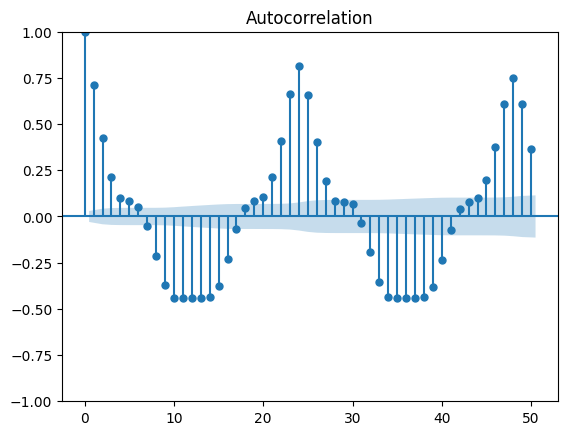

In [4]:
# Visual inspection
plt.figure(figsize=(14, 10))
plt.plot(df["orders"], label="Data")
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Decomposition
decomposition = seasonal_decompose(df["orders"], model="additive", period=24)
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

# Autocorrelation Function (ACF)
# Calculate the ACF values
acf_values = acf(df["orders"], nlags=50)

# Ignore the first lag (lag 0) and find the lag with the maximum ACF value
best_lag = np.argmax(acf_values[1:]) + 1  # Adding 1 to correct for zero-indexing

# Output the best lag
print(f"The best lag for seasonality is: {best_lag}")
plt.figure(figsize=(14, 10))
plot_acf(df["orders"], lags=50)
plt.show()

## Check for stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["orders"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -6.839311436070939
p-value: 1.8082997215702738e-09


## Nueral Prophet Model

In [6]:
from neuralprophet import NeuralProphet

forecast_steps = 168
train = df.iloc[:-forecast_steps]
test = df.iloc[-forecast_steps:]
neuralprophet_train = train.reset_index()[["datetime", "orders"]].rename(columns={"datetime": "ds", "orders": "y"})
neuralprophet = NeuralProphet()
neuralprophet.fit(neuralprophet_train, freq="H", epochs=5)
neuralprophet_future = neuralprophet.make_future_dataframe(df=neuralprophet_train, periods=forecast_steps)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.976% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/gary

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHu

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.976% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

# 1. Create A Demand Forecasting Model

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)



Splitting data...
AR model...


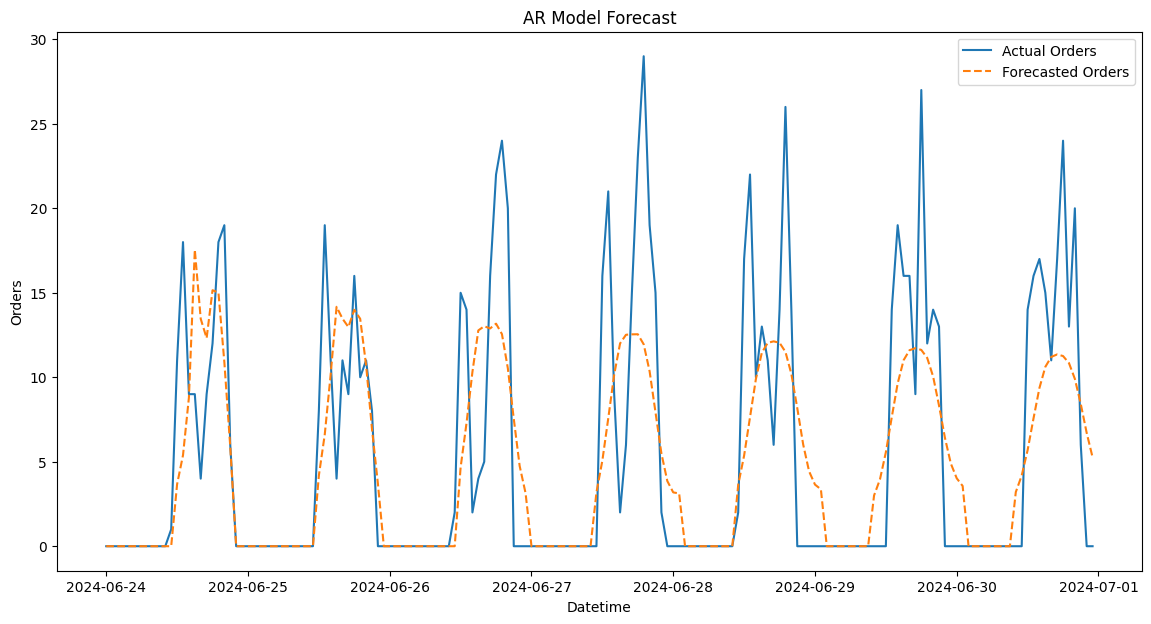

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



MA model...


WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



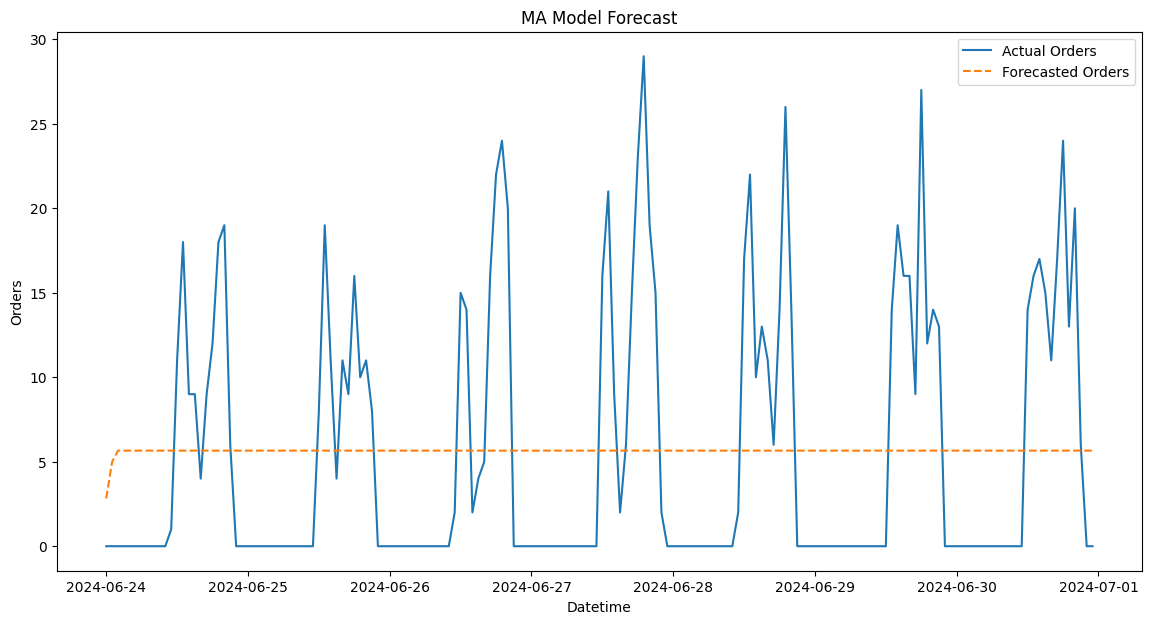

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



ARIMA model...


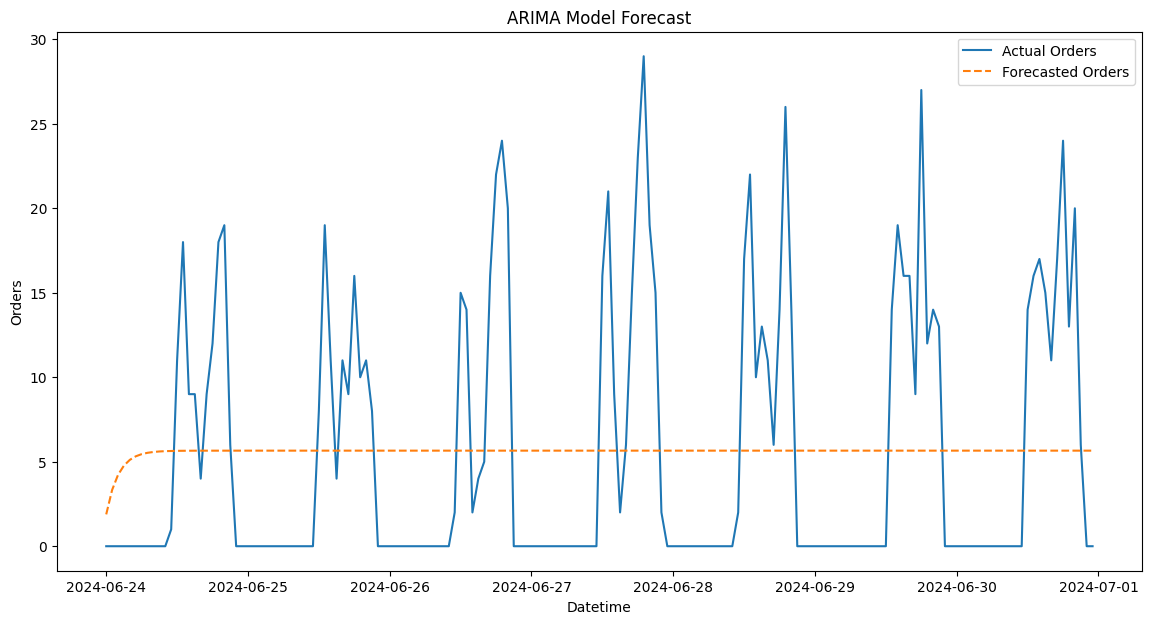

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



SARIMAX model...


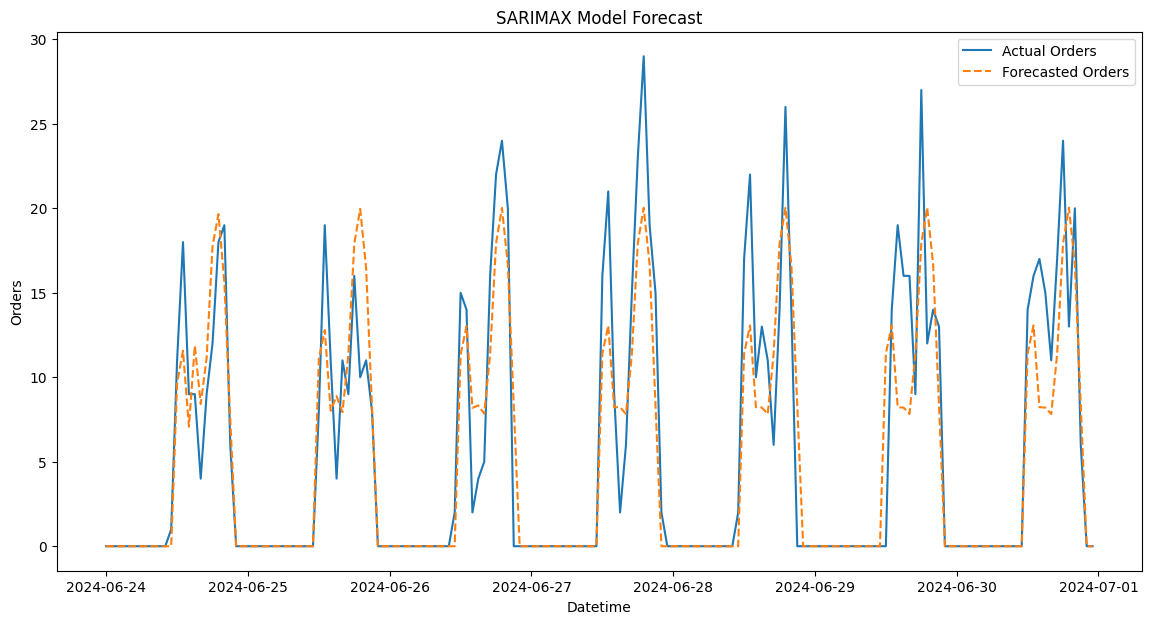

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)



SES model...


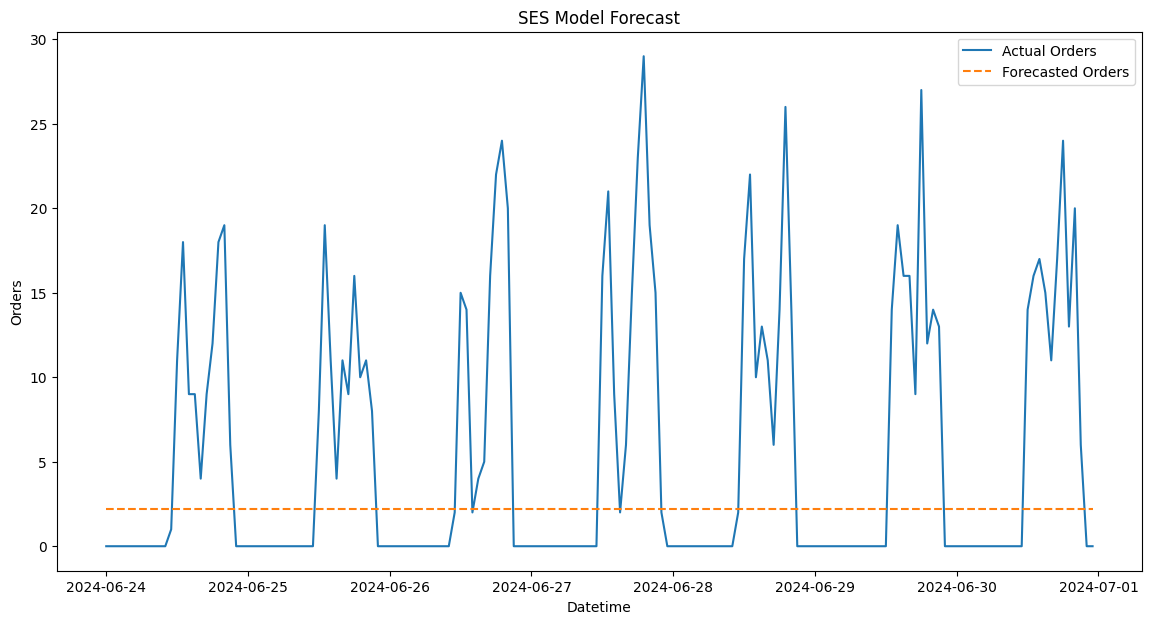

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



HWES model...


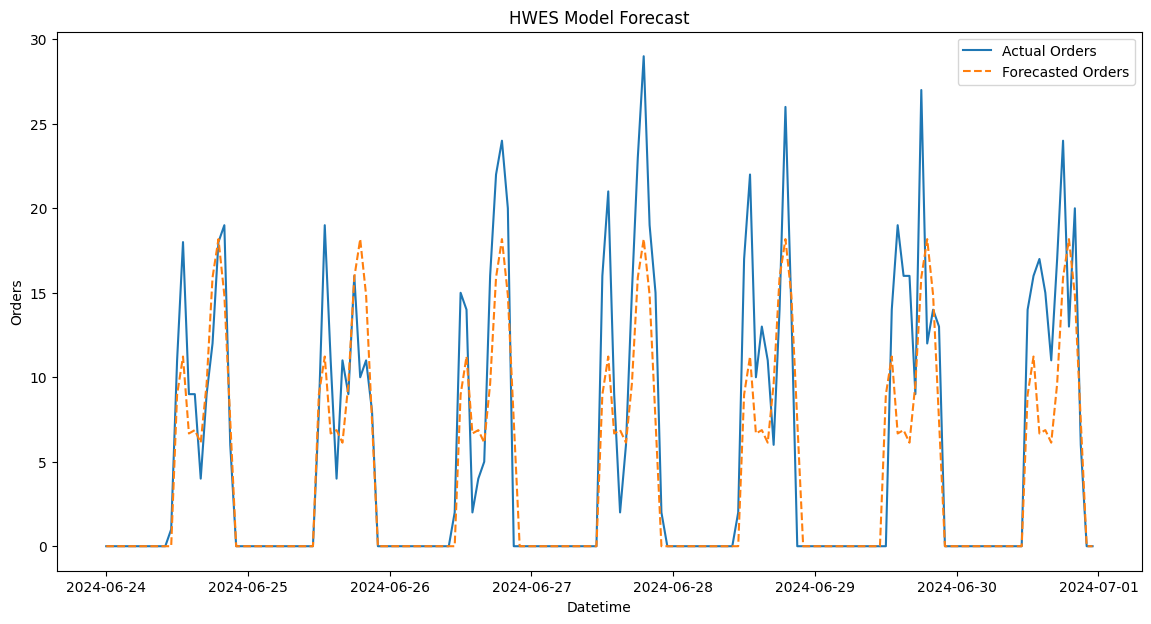

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:00:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost model...


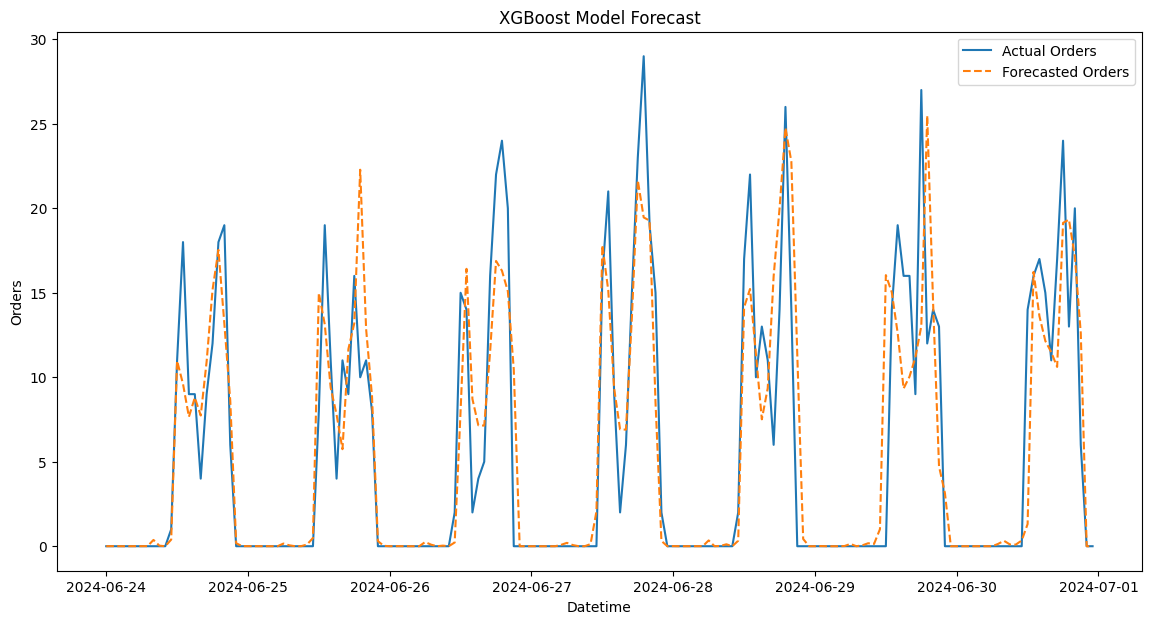

Prophet model...


15:00:33 - cmdstanpy - INFO - Chain [1] start processing
15:00:33 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



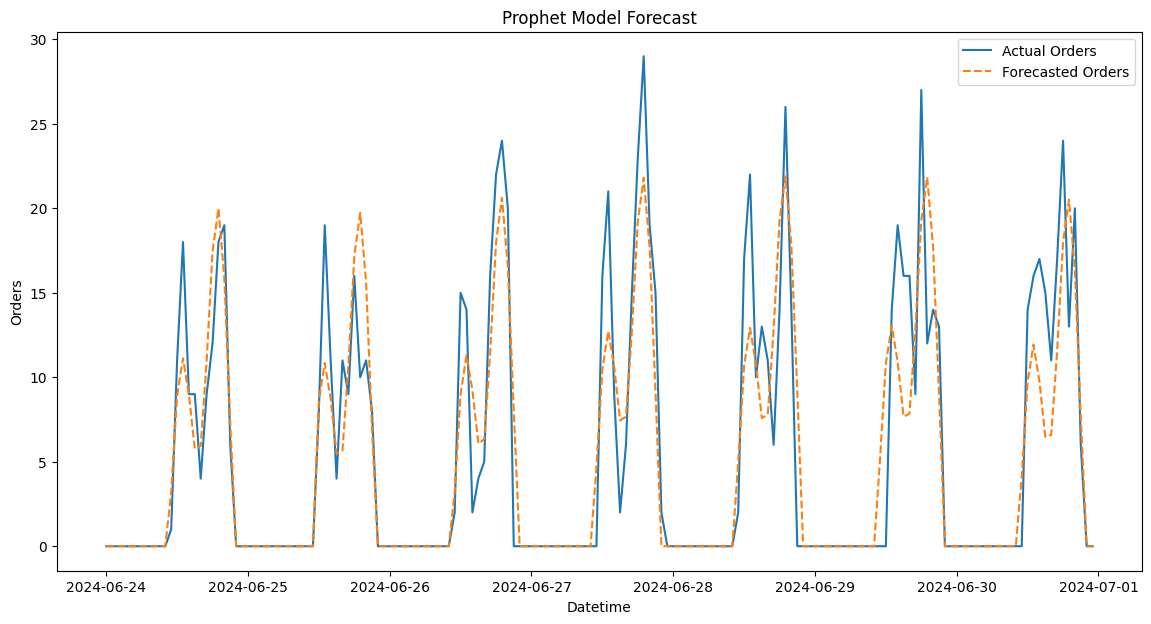

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



LSTM model...
Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0247
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0117
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0116
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0113
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0113
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0103
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0096
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0096
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0086
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0081
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0085
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0073
Epoch 13/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0076
Epoch 14/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0073
Epoch 15/20
131/131 ━━━━━━━━━

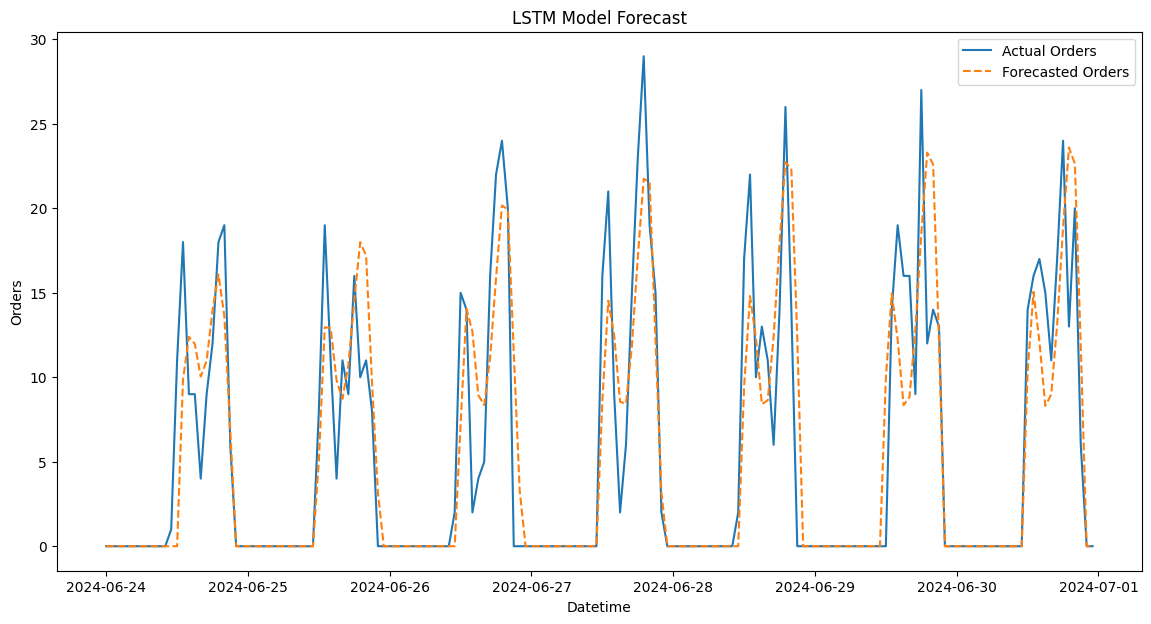

Random Forest model...


WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(



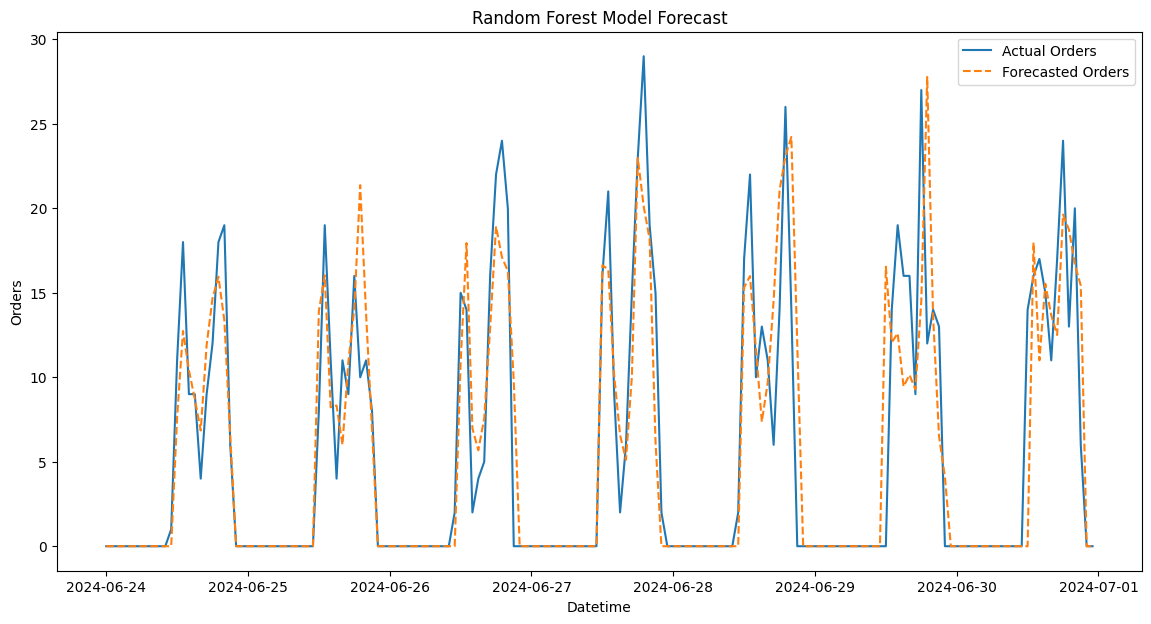

LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 4176, number of used features: 24
[LightGBM] [Info] Start training from score 5.656609


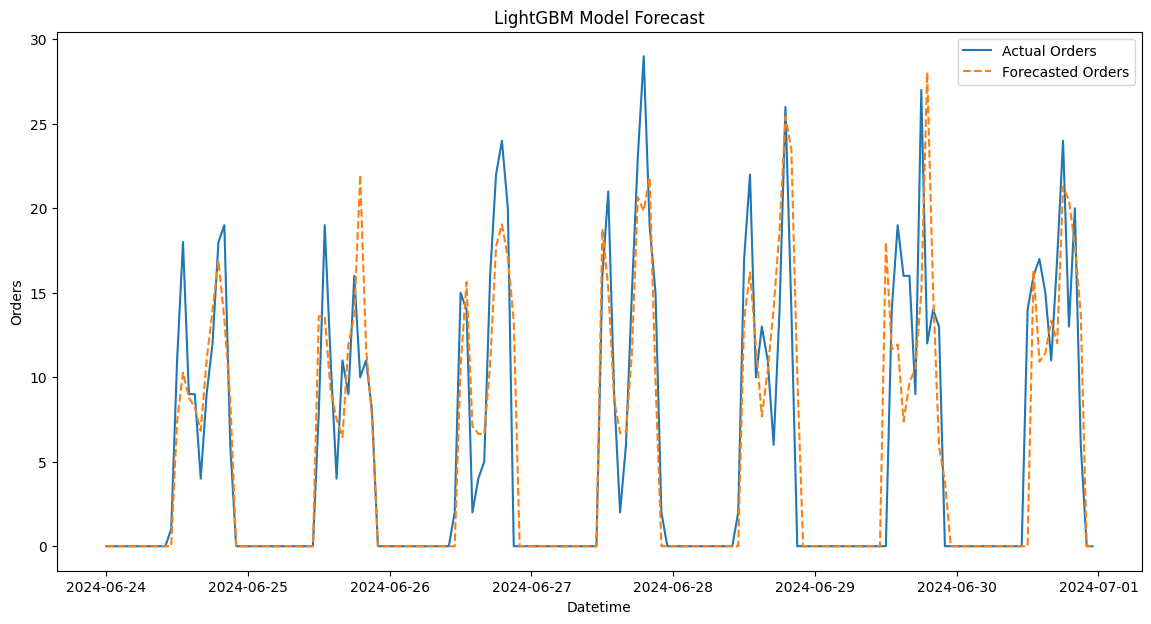

CatBoost model...


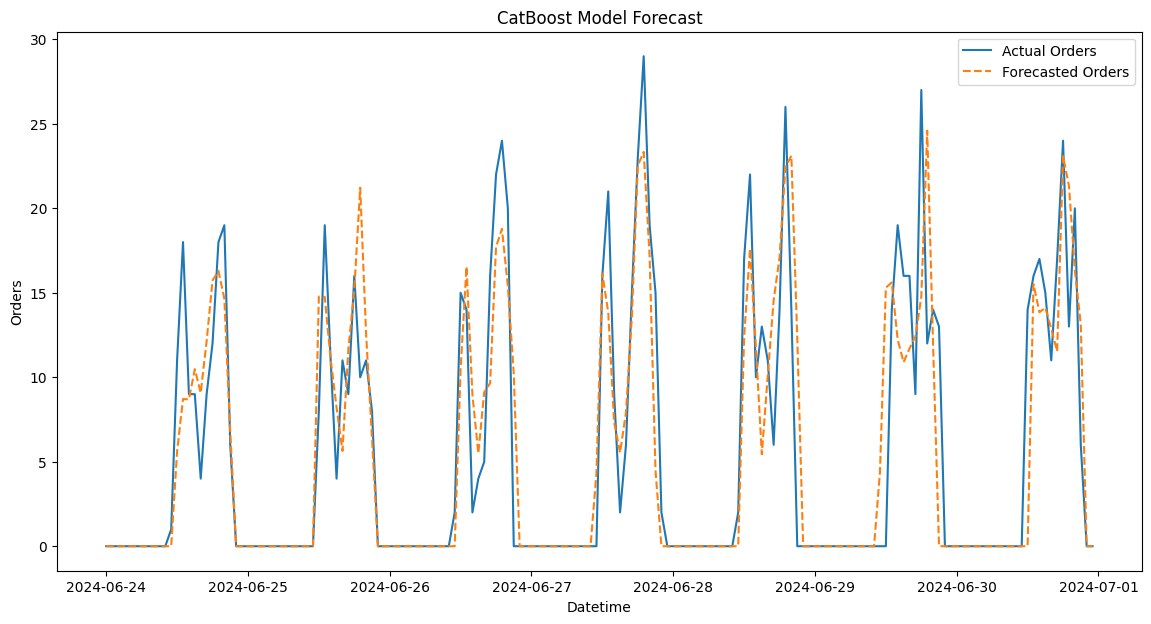

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.976% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/gary

NeuralProphet model...


Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHu

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.976% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

Predicting: 66it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


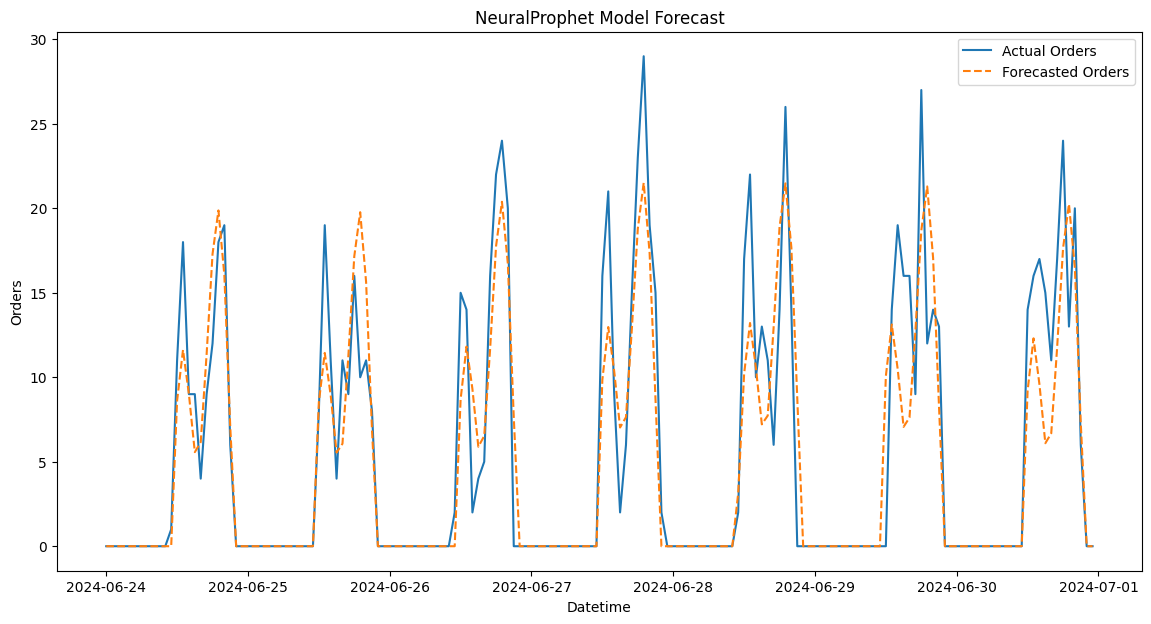

ESN model...


Running Ridge-0: 100%|██████████| 167/167 [00:00<00:00, 24740.35it/s]


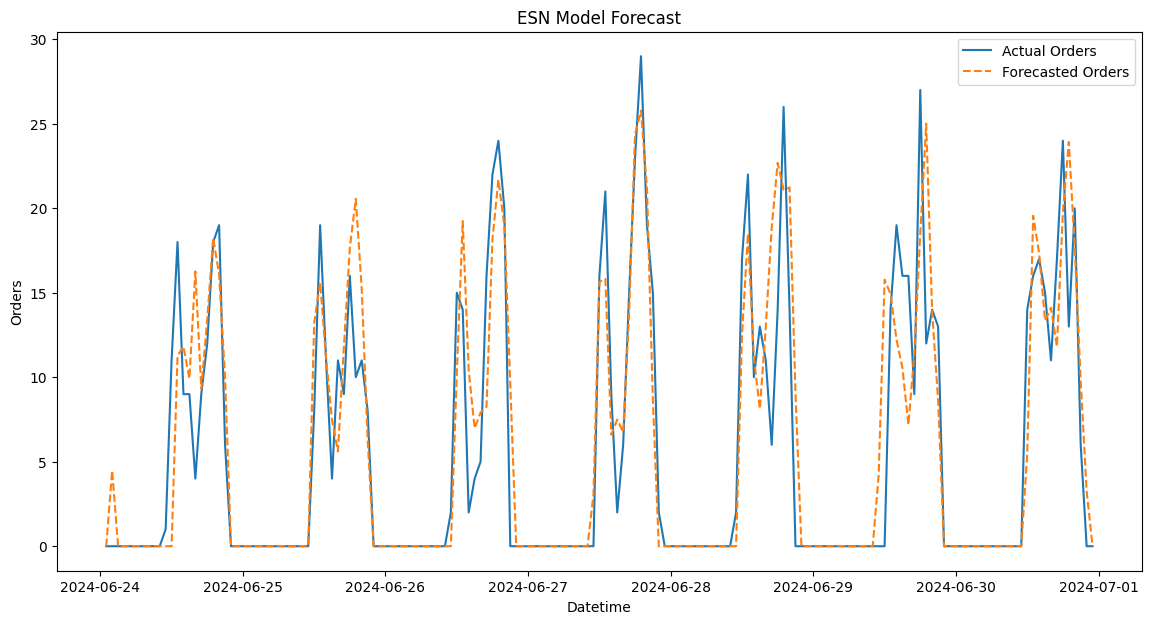

Transformer model...
Transformer model...
Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3513
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2856
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1698
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0820
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0410
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0289
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0221
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126
Epoch 12/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0129
Epoch 13/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0124
Epoch 14/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0114
Epoch 15/20
109

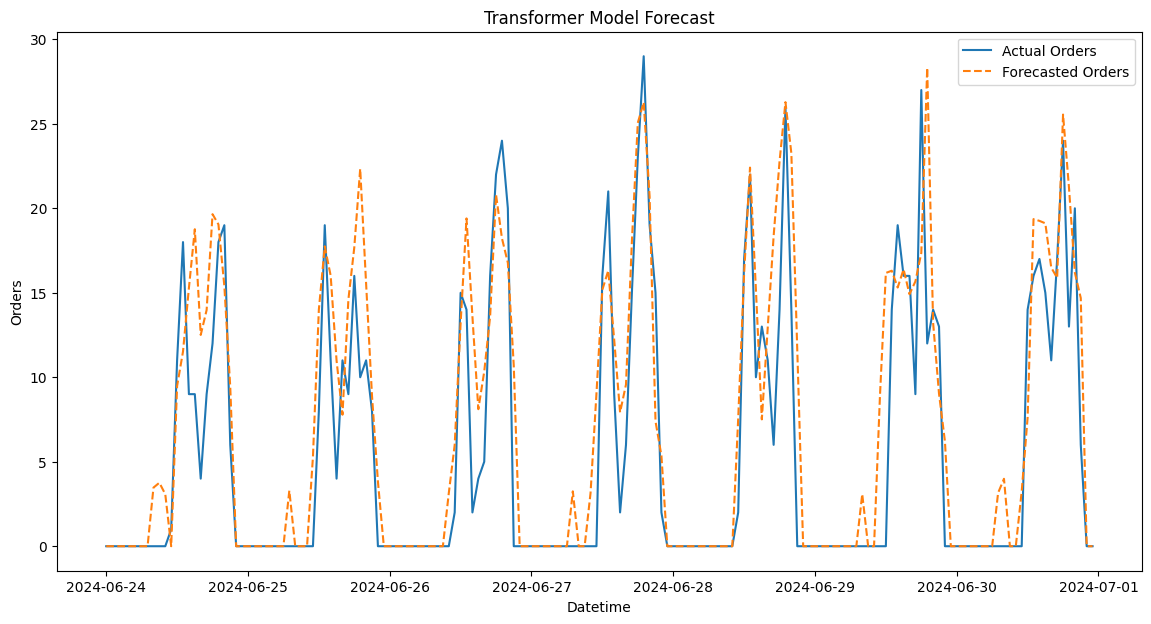

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.976% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/gary/.local/share/virtualenvs/Smart_Scheduling_Challenge-_pseD44T/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

Compiling results...
Results compiled.
            Model       MAE      RMSE      RMSE %
12  NeuralProphet  1.956562  3.459523   62.360503
3         SARIMAX  1.987919  3.469653   62.543105
7         Prophet  2.048979  3.518978   63.432215
5            HWES  2.123617  3.812316   68.719868
8            LSTM  2.176944  3.825218   68.952419
13            ESN  2.092224  3.864501   69.245893
9    RandomForest  2.021012  3.898231   70.268540
6         XGBoost  2.096299  3.946153   71.132380
10       LightGBM  2.045879  3.961258   71.404653
11       CatBoost  2.097222  3.965562   71.482227
14    Transformer  2.580960  4.317994   77.835091
0              AR  3.248997  5.222669   94.142534
2           ARIMA  6.704932  7.724449  139.239001
1              MA  6.742383  7.746194  139.630962
4             SES  5.913446  8.450309  152.323160
The best model is: NeuralProphet


Predicting: 66it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /var/folders/cs/9mtkh77d5pg76nnc5k1qw1br0000gn/T/ipykernel_10611/2432142708.py:481: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  next_week_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq="H")



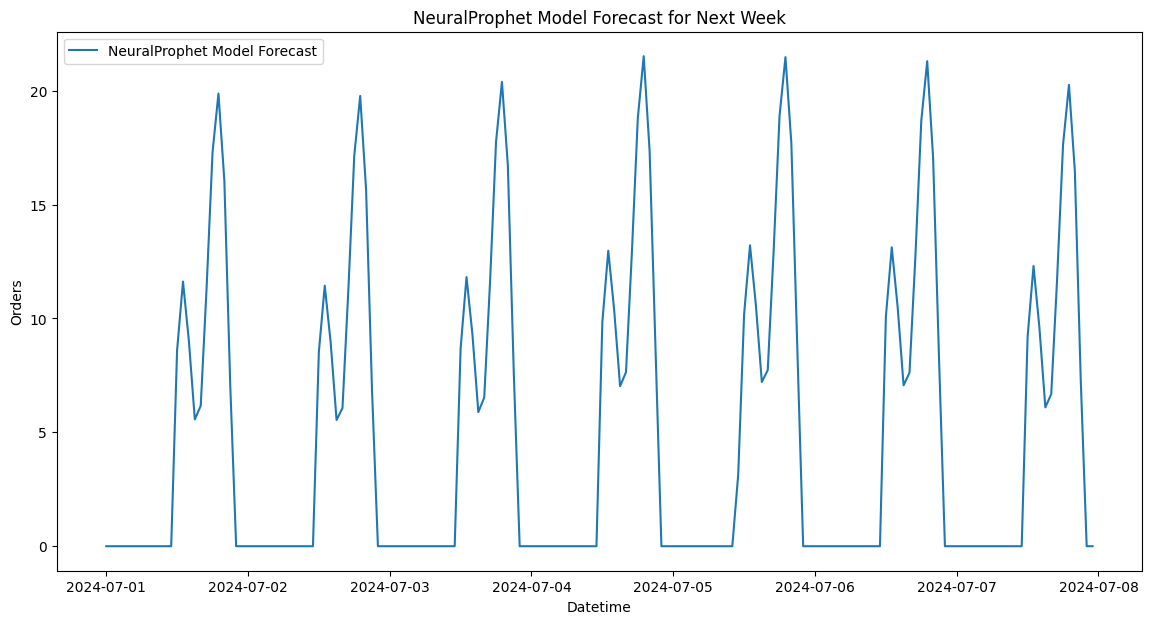

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
from neuralprophet import NeuralProphet
from reservoirpy.nodes import Reservoir, Ridge
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the number of steps for the last week (7 days x 24 hours)
forecast_steps = 168

# Split the data
print("Splitting data...")
train = df.iloc[:-forecast_steps]
test = df.iloc[-forecast_steps:]


# Function to calculate errors
def calculate_errors(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rmse_percentage_error = (rmse / np.mean(y_true)) * 100
    return mae, rmse, rmse_percentage_error


# Function to plot the forecast
def plot_forecast(title, y_true, y_pred):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true.index, y_true, label="Actual Orders")
    plt.plot(y_true.index, y_pred, label="Forecasted Orders", linestyle="--")
    plt.title(title)
    plt.xlabel("Datetime")
    plt.ylabel("Orders")
    plt.legend()
    plt.show()


# 1. Autoregressive (AR) Model
print("AR model...")
ar_model = AutoReg(train["orders"], lags=24).fit()
ar_forecast = ar_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
ar_forecast = np.where(ar_forecast <= 3, 0, ar_forecast)
ar_mae, ar_rmse, ar_rmse_pct = calculate_errors(test["orders"], ar_forecast)
plot_forecast("AR Model Forecast", test["orders"], ar_forecast)

# 2. Moving Average (MA) Model
print("MA model...")
ma_model = ARIMA(train["orders"], order=(0, 0, 2)).fit()
ma_forecast = ma_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
ma_forecast = np.maximum(ma_forecast, 0)
ma_mae, ma_rmse, ma_rmse_pct = calculate_errors(test["orders"], ma_forecast)
plot_forecast("MA Model Forecast", test["orders"], ma_forecast)

# 3. ARIMA Model
print("ARIMA model...")
arima_model = ARIMA(train["orders"], order=(1, 0, 1)).fit()
arima_forecast = arima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
arima_forecast = np.maximum(arima_forecast, 0)
arima_mae, arima_rmse, arima_rmse_pct = calculate_errors(test["orders"], arima_forecast)
plot_forecast("ARIMA Model Forecast", test["orders"], arima_forecast)

# 4. SARIMAX Model
print("SARIMAX model...")
sarimax_model = SARIMAX(train["orders"], order=(1, 0, 1), seasonal_order=(1, 1, 1, 24)).fit(disp=False)
sarimax_forecast = sarimax_model.get_forecast(steps=forecast_steps).predicted_mean
sarimax_forecast = np.where(sarimax_forecast <= 3, 0, sarimax_forecast)
sarimax_mae, sarimax_rmse, sarimax_rmse_pct = calculate_errors(test["orders"], sarimax_forecast)
plot_forecast("SARIMAX Model Forecast", test["orders"], sarimax_forecast)

# 5. Simple Exponential Smoothing (SES)
print("SES model...")
train_nonzero = train["orders"]
ses_model = SimpleExpSmoothing(train_nonzero).fit(smoothing_level=0.5)
ses_forecast = ses_model.forecast(steps=forecast_steps)
ses_forecast = np.maximum(ses_forecast, 0)
ses_mae, ses_rmse, ses_rmse_pct = calculate_errors(test["orders"], ses_forecast)
plot_forecast("SES Model Forecast", test["orders"], ses_forecast)

# 6. Holt-Winters Seasonal Exponential Smoothing (HWES)
print("HWES model...")
hwes_model = ExponentialSmoothing(train["orders"], seasonal="add", seasonal_periods=24).fit()
hwes_forecast = hwes_model.forecast(steps=forecast_steps)
hwes_forecast = np.where(hwes_forecast <= 3, 0, hwes_forecast)
hwes_mae, hwes_rmse, hwes_rmse_pct = calculate_errors(test["orders"], hwes_forecast)
plot_forecast("HWES Model Forecast", test["orders"], hwes_forecast)

# 7. XGBoost Model
print("XGBoost model...")


def create_lagged_features(data, lags):
    df = pd.DataFrame()
    for lag in range(1, lags + 1):
        df[f"lag_{lag}"] = data.shift(lag)
    return df


lags = 24
train_features = create_lagged_features(train["orders"], lags).iloc[lags:]
train_target = train["orders"].iloc[lags:]
train_target = train_target.values.ravel()
train_features = train_features.values
test_features = create_lagged_features(df["orders"], lags).iloc[-forecast_steps:]

dtrain = xgb.DMatrix(train_features, label=train_target)
dtest = xgb.DMatrix(test_features)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "seed": 42,
    "colsample_bytree": 1.0,
    "learning_rate": 0.1,
    "max_depth": 5,
    "n_estimators": 100,
    "reg_alpha": 0.1,
    "reg_lambda": 1,
    "subsample": 1.0,
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)
xgb_forecast = xgb_model.predict(dtest)
xgb_forecast = np.maximum(xgb_forecast, 0)
xgb_mae, xgb_rmse, xgb_rmse_pct = calculate_errors(test["orders"], xgb_forecast)
plot_forecast("XGBoost Model Forecast", test["orders"], xgb_forecast)

# 8. Prophet Model
print("Prophet model...")
prophet_train = train.reset_index().rename(columns={"datetime": "ds", "orders": "y"})
prophet = Prophet()
prophet.fit(prophet_train)
future = prophet.make_future_dataframe(periods=forecast_steps, freq="H")
prophet_forecast = prophet.predict(future)["yhat"][-forecast_steps:]
prophet_forecast = np.where(prophet_forecast <= 3, 0, prophet_forecast)
prophet_mae, prophet_rmse, prophet_rmse_pct = calculate_errors(test["orders"], prophet_forecast)
plot_forecast("Prophet Model Forecast", test["orders"], prophet_forecast)

# 9. LSTM Model
print("LSTM model...")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train["orders"].values.reshape(-1, 1))

X_train = []
y_train = []
for i in range(24, len(scaled_train)):
    X_train.append(scaled_train[i - 24 : i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=75))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer="adam", loss="mean_squared_error")
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

scaled_test = scaler.transform(test["orders"].values.reshape(-1, 1))
X_input = scaled_train[-24:]
X_input = np.reshape(X_input, (1, X_input.shape[0], 1))

lstm_forecast = []
for _ in range(forecast_steps):  # Predict for 168 hours
    prediction = lstm_model.predict(X_input)
    lstm_forecast.append(prediction[0, 0])

    X_input = np.append(X_input[:, 1:, :], np.reshape(prediction, (1, 1, 1)), axis=1)

lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))
lstm_forecast = np.where(lstm_forecast <= 3, 0, lstm_forecast)
lstm_mae, lstm_rmse, lstm_rmse_pct = calculate_errors(test["orders"], lstm_forecast)
plot_forecast("LSTM Model Forecast", test["orders"], lstm_forecast)

# 10. Random Forest Regressor
print("Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_target)
rf_forecast = rf_model.predict(test_features)
rf_forecast = np.where(rf_forecast <= 3, 0, rf_forecast)
rf_mae, rf_rmse, rf_rmse_pct = calculate_errors(test["orders"], rf_forecast)
plot_forecast("Random Forest Model Forecast", test["orders"], rf_forecast)

# 11. LightGBM Model
print("LightGBM model...")
lgb_train = lgb.Dataset(train_features, label=train_target)
lgb_params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)
lgb_forecast = lgb_model.predict(test_features)
lgb_forecast = np.where(lgb_forecast <= 3, 0, lgb_forecast)
lgb_mae, lgb_rmse, lgb_rmse_pct = calculate_errors(test["orders"], lgb_forecast)
plot_forecast("LightGBM Model Forecast", test["orders"], lgb_forecast)

# 12. CatBoost Model
print("CatBoost model...")
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, loss_function="RMSE", verbose=0)
cat_model.fit(train_features, train_target)
cat_forecast = cat_model.predict(test_features)
cat_forecast = np.where(cat_forecast <= 3, 0, cat_forecast)
cat_mae, cat_rmse, cat_rmse_pct = calculate_errors(test["orders"], cat_forecast)
plot_forecast("CatBoost Model Forecast", test["orders"], cat_forecast)

# 13. NeuralProphet Model
print("NeuralProphet model...")
neuralprophet_train = train.reset_index()[["datetime", "orders"]].rename(columns={"datetime": "ds", "orders": "y"})
neuralprophet = NeuralProphet(epochs=100)
neuralprophet.fit(neuralprophet_train, freq="H")
neuralprophet_future = neuralprophet.make_future_dataframe(df=neuralprophet_train, periods=forecast_steps)
neuralprophet_forecast = neuralprophet.predict(neuralprophet_future)["yhat1"][-forecast_steps:]
neuralprophet_forecast = np.where(neuralprophet_forecast <= 3, 0, neuralprophet_forecast)
neuralprophet_mae, neuralprophet_rmse, neuralprophet_rmse_pct = calculate_errors(test["orders"], neuralprophet_forecast)
plot_forecast("NeuralProphet Model Forecast", test["orders"], neuralprophet_forecast)

# 14. Echo State Network (ESN) Model
print("ESN model...")
# Normalize the data
train_data = (train["orders"].values - np.mean(train["orders"])) / np.std(train["orders"])
test_data = (test["orders"].values - np.mean(test["orders"])) / np.std(test["orders"])

# Initialize the ESN model
reservoir = Reservoir(input_scaling=0.1, units=300, sr=1.2)
readout = Ridge(ridge=1e-7)

# Train the ESN model
states = reservoir.run(train_data[:-1].reshape(-1, 1))
target = train_data[1:].reshape(-1, 1)
readout.fit(states, target)

# Forecast using the ESN model
test_states = reservoir.run(test_data[:-1].reshape(-1, 1))
esn_forecast = readout.run(test_states)

# Denormalize the forecast
esn_forecast = esn_forecast * np.std(train["orders"]) + np.mean(train["orders"])
esn_forecast = np.where(esn_forecast <= 3, 0, esn_forecast)

# Calculate ESN errors
esn_mae, esn_rmse, esn_rmse_pct = calculate_errors(test["orders"].values[1:], esn_forecast)
plot_forecast("ESN Model Forecast", test["orders"].iloc[1:], esn_forecast)

# 15. Transformer Model
print("Transformer model...")
# Prepare the data for the Transformer model
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df[["orders"]].values)

X = []
y = []
input_length = 24
for i in range(input_length, len(data)):
    X.append(data[i - input_length : i])
    y.append(data[i])
X, y = np.array(X), np.array(y)

# Split into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Custom wrapper for Keras model with the best parameters
def build_transformer_model(d_model=64, num_heads=2, ff_dim=128, dropout_rate=0.2, input_length=24):
    inputs = layers.Input(shape=(input_length, 1))
    attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(inputs, inputs)
    attention = layers.Dropout(dropout_rate)(attention)
    attention = layers.LayerNormalization(epsilon=1e-6)(attention)
    attention = layers.Add()([attention, inputs])

    ff = layers.Dense(ff_dim, activation="relu")(attention)
    ff = layers.Dense(d_model)(ff)
    ff = layers.Dropout(dropout_rate)(ff)
    ff = layers.LayerNormalization(epsilon=1e-6)(ff)
    outputs = layers.Add()([ff, attention])

    outputs = layers.Flatten()(outputs)
    outputs = layers.Dense(1)(outputs)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="mse")
    return model


# Build and train the Transformer model with the best parameters
print("Transformer model...")
transformer_model = build_transformer_model(d_model=64, num_heads=2, ff_dim=128, dropout_rate=0.2, input_length=24)
transformer_model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[EarlyStopping(monitor="loss", patience=3)])

# Predict on the test set
transformer_forecast = transformer_model.predict(X_test)
transformer_forecast = transformer_forecast.flatten()  # Flatten the prediction array to 1D

# Inverse transform the predictions to original scale
transformer_forecast = scaler.inverse_transform(transformer_forecast.reshape(-1, 1)).flatten()

# Set values less than or equal to 3 to 0
transformer_forecast = np.where(transformer_forecast <= 3, 0, transformer_forecast)

# Inverse transform the test data to original scale
y_test_inv = scaler.inverse_transform(y_test).flatten()

# Calculate errors for the Transformer model
transformer_mae, transformer_rmse, transformer_rmse_pct = calculate_errors(
    y_test_inv[-forecast_steps:], transformer_forecast[-forecast_steps:]
)

# Plot the forecast using the existing plot_forecast function
plot_forecast(
    "Transformer Model Forecast",
    pd.Series(y_test_inv[-forecast_steps:], index=test.index),
    pd.Series(transformer_forecast[-forecast_steps:], index=test.index),
)

# Store the error metrics in a DataFrame
print("Compiling results...")
results = pd.DataFrame(
    {
        "Model": [
            "AR",
            "MA",
            "ARIMA",
            "SARIMAX",
            "SES",
            "HWES",
            "XGBoost",
            "Prophet",
            "LSTM",
            "RandomForest",
            "LightGBM",
            "CatBoost",
            "NeuralProphet",
            "ESN",
            "Transformer",
        ],
        "MAE": [
            ar_mae,
            ma_mae,
            arima_mae,
            sarimax_mae,
            ses_mae,
            hwes_mae,
            xgb_mae,
            prophet_mae,
            lstm_mae,
            rf_mae,
            lgb_mae,
            cat_mae,
            neuralprophet_mae,
            esn_mae,
            transformer_mae,
        ],
        "RMSE": [
            ar_rmse,
            ma_rmse,
            arima_rmse,
            sarimax_rmse,
            ses_rmse,
            hwes_rmse,
            xgb_rmse,
            prophet_rmse,
            lstm_rmse,
            rf_rmse,
            lgb_rmse,
            cat_rmse,
            neuralprophet_rmse,
            esn_rmse,
            transformer_rmse,
        ],
        "RMSE %": [
            ar_rmse_pct,
            ma_rmse_pct,
            arima_rmse_pct,
            sarimax_rmse_pct,
            ses_rmse_pct,
            hwes_rmse_pct,
            xgb_rmse_pct,
            prophet_rmse_pct,
            lstm_rmse_pct,
            rf_rmse_pct,
            lgb_rmse_pct,
            cat_rmse_pct,
            neuralprophet_rmse_pct,
            esn_rmse_pct,
            transformer_rmse_pct,
        ],
    }
)

results_sorted = results.sort_values(by="RMSE %")
print("Results compiled.")
print(results_sorted)

# Identify the best model
best_model_name = results_sorted.iloc[0]["Model"]
print(f"The best model is: {best_model_name}")

# Forecast the next week's orders using the best model
if best_model_name == "AR":
    best_model_forecast = ar_model.predict(
        start=test.index[-1] + pd.Timedelta(hours=1),
        end=test.index[-1] + pd.Timedelta(hours=forecast_steps),
        dynamic=False,
    )
elif best_model_name == "MA":
    best_model_forecast = ma_model.predict(
        start=test.index[-1] + pd.Timedelta(hours=1),
        end=test.index[-1] + pd.Timedelta(hours=forecast_steps),
        dynamic=False,
    )
elif best_model_name == "ARIMA":
    best_model_forecast = arima_model.predict(
        start=test.index[-1] + pd.Timedelta(hours=1),
        end=test.index[-1] + pd.Timedelta(hours=forecast_steps),
        dynamic=False,
    )
elif best_model_name == "SARIMAX":
    best_model_forecast = sarimax_model.get_forecast(steps=forecast_steps).predicted_mean
elif best_model_name == "SES":
    best_model_forecast = ses_model.forecast(steps=forecast_steps)
elif best_model_name == "HWES":
    best_model_forecast = hwes_model.forecast(steps=forecast_steps)
elif best_model_name == "XGBoost":
    next_week_features = create_lagged_features(df["orders"], lags).iloc[-forecast_steps:]
    dnext_week = xgb.DMatrix(next_week_features)
    best_model_forecast = xgb_model.predict(dnext_week)
elif best_model_name == "Prophet":
    future_next_week = prophet.make_future_dataframe(periods=forecast_steps, freq="H", include_history=False)
    best_model_forecast = prophet.predict(future_next_week)["yhat"]
elif best_model_name == "LSTM":
    for _ in range(forecast_steps):  # Predict for 168 hours
        prediction = lstm_model.predict(X_input)
        best_model_forecast.append(prediction[0, 0])
        X_input = np.append(X_input[:, 1:, :], np.reshape(prediction, (1, 1, 1)), axis=1)
    best_model_forecast = scaler.inverse_transform(np.array(best_model_forecast).reshape(-1, 1))
elif best_model_name == "RandomForest":
    best_model_forecast = rf_model.predict(test_features)
elif best_model_name == "LightGBM":
    best_model_forecast = lgb_model.predict(test_features)
elif best_model_name == "CatBoost":
    best_model_forecast = cat_model.predict(test_features)
elif best_model_name == "NeuralProphet":
    neuralprophet_future_next_week = neuralprophet.make_future_dataframe(df=neuralprophet_train, periods=forecast_steps)
    best_model_forecast = neuralprophet.predict(neuralprophet_future_next_week)["yhat1"]
elif best_model_name == "ESN":
    test_states = reservoir.run(train_data[-24:].reshape(-1, 1))  # Use the last 24 points of train data as input
    esn_forecast = []
    for _ in range(forecast_steps):
        prediction = readout.run(test_states[-1].reshape(1, -1))
        esn_forecast.append(prediction[0, 0])
        test_states = np.append(test_states[1:], prediction, axis=0)

    best_model_forecast = np.array(esn_forecast) * np.std(train["orders"]) + np.mean(train["orders"])
elif best_model_name == "Transformer":
    best_model_forecast = best_model.predict(X_test)

# Ensure the forecast is non-negative
best_model_forecast = np.where(best_model_forecast <= 3, 0, best_model_forecast)

# Plot the forecast for the next week
next_week_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq="H")
plt.figure(figsize=(14, 7))
plt.plot(next_week_dates, best_model_forecast, label=f"{best_model_name} Model Forecast")
plt.title(f"{best_model_name} Model Forecast for Next Week")
plt.xlabel("Datetime")
plt.ylabel("Orders")
plt.legend()
plt.show()

# 2. Optimal Level Of Staff For A Given Level Of Orders

In [8]:
# Calculate total labour hours
df["total_labour_hours"] = df["management"] + df["back-of-house"] + df["front-of-house"]

# Find the minimum labour hours for each order level
best_config_table = df.loc[df.groupby("orders")["total_labour_hours"].idxmin()].reset_index()

# Calculate OPLH (Orders per Labour Hour)
best_config_table["OPLH"] = best_config_table["orders"] / best_config_table["total_labour_hours"]

# Round staffing levels to the nearest whole number (not needed if already integer)
best_config_table["management"] = best_config_table["management"]
best_config_table["back-of-house"] = best_config_table["back-of-house"]
best_config_table["front-of-house"] = best_config_table["front-of-house"]
best_config_table

,datetime,orders,management,back-of-house,front-of-house,total_labour_hours,OPLH
0,2024-01-01 00:00:00,0,0.0,0.0,0.0,0.0,NaN
1,2024-05-26 00:00:00,1,0.0,0.0,0.0,0.0,inf
2,2024-01-01 11:00:00,2,1.0,1.0,0.5,2.5,0.800000
3,2024-01-18 09:00:00,3,1.0,1.0,0.0,2.0,1.500000
4,2024-05-18 12:00:00,4,2.0,1.0,0.0,3.0,1.333333
5,2024-05-12 12:00:00,5,1.0,1.0,0.0,2.0,2.500000
6,2024-01-28 12:00:00,6,1.0,2.0,1.0,4.0,1.500000
7,2024-01-15 16:00:00,7,1.0,1.0,0.0,2.0,3.500000
8,2024-05-18 14:00:00,8,2.0,1.0,0.0,3.0,2.666667
9,2024-05-18 13:00:00,9,2.0,1.0,0.0,3.0,3.000000


# Minimum Setup and Closing Staff Needed

In [9]:
# Filter data where orders are 0, but there is staff scheduled
zero_orders_staffed = df[
    (df["orders"] == 0) & ((df["management"] > 0) | (df["back-of-house"] > 0) | (df["front-of-house"] > 0))
]

# Extract hour of the day and day of the week
zero_orders_staffed["hour"] = zero_orders_staffed.index.hour
zero_orders_staffed["day_of_week"] = zero_orders_staffed.index.day_name()

# Calculate the minimum staff required by hour and day of the week
min_staff_by_hour_day = (
    zero_orders_staffed.groupby(["day_of_week", "hour"])[["management", "back-of-house", "front-of-house"]]
    .mean()
    .round()
)

min_staff_by_hour_day = min_staff_by_hour_day[~min_staff_by_hour_day.index.get_level_values("hour").isin([7, 8])]
min_staff_by_hour_day

WARNING - (py.warnings._showwarnmsg) - /var/folders/cs/9mtkh77d5pg76nnc5k1qw1br0000gn/T/ipykernel_10611/1539464785.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_orders_staffed["hour"] = zero_orders_staffed.index.hour

WARNING - (py.warnings._showwarnmsg) - /var/folders/cs/9mtkh77d5pg76nnc5k1qw1br0000gn/T/ipykernel_10611/1539464785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_orders_staffed["day_of_week"] = zero_orders_staffed.index.day_name()



management  back-of-house  front-of-house
day_of_week hour                                           
Friday      9            1.0            1.0             0.0
            10           1.0            1.0             1.0
            11           1.0            2.0             1.0
            21           2.0            4.0             2.0
            22           1.0            4.0             1.0
            23           0.0            1.0             0.0
Monday      9            1.0            1.0             0.0
            10           1.0            1.0             1.0
            11           1.0            1.0             1.0
            21           1.0            4.0             2.0
            22           1.0            2.0             0.0
Saturday    9            1.0            1.0             0.0
            10           1.0            2.0             1.0
            11           1.0            2.0             1.0
            12           1.0            2.0             1.0
            22           1.0            4.0             1.0
            23           0.0            1.0             0.0
Sunday      9            1.0            0.0             0.0
            10           1.0            1.0             1.0
            11           1.0            1.0             1.0
            21           1.0            3.0             2.0
            22           1.0            2.0             0.0
            23           0.0            0.0             0.0
Thursday    9            1.0            1.0             0.0
            10           1.0            1.0             1.0
            11           1.0            2.0             1.0
            22           1.0            3.0             1.0
            23           0.0            1.0             0.0
Tuesday     9            1.0            1.0             0.0
            10           1.0            1.0             1.0
            11           1.0            2.0             1.0
            17           1.0            2.0             1.0
            21           1.0            3.0             2.0
            22           1.0            2.0             0.0
Wednesday   9            1.0            1.0             0.0
            10           1.0            1.0             1.0
            11           1.0            2.0             1.0
            16           1.0            2.0             1.0
            21           1.0            4.0             2.0
            22           1.0            2.0             0.0

# 3. Staffing Schedule for 1-7th July

In [10]:
# Convert the numpy array to a Pandas Series and set the datetime index
best_model_forecast = pd.Series(best_model_forecast, index=next_week_dates)

# Now proceed with the rest of the code
# Initialize an empty DataFrame for the staff schedule
staff_schedule = pd.DataFrame(index=next_week_dates)


# Find the best staffing configuration for each forecasted order count
def get_best_staffing_configuration(order_count):
    config = best_config_table[best_config_table["orders"] == order_count].iloc[0]
    config = config.drop(labels=["datetime"])  # Drop the 'datetime' column if it exists
    return config


# Map the forecasted orders to the best staffing configuration
staff_schedule["orders"] = best_model_forecast

# Apply the best staffing configuration
staff_schedule = staff_schedule.apply(lambda row: get_best_staffing_configuration(int(round(row["orders"]))), axis=1)

# Reset the index and rename it to 'datetime'
staff_schedule.reset_index(inplace=True)
staff_schedule.rename(columns={"index": "datetime"}, inplace=True)

# Add Orders per Labour Hour (OPLH) to the staff schedule
staff_schedule["OPLH"] = staff_schedule["orders"] / staff_schedule["total_labour_hours"]

# Extract the hour and day_of_week from the staff_schedule for merging
staff_schedule["hour"] = staff_schedule["datetime"].dt.hour
staff_schedule["day_of_week"] = staff_schedule["datetime"].dt.day_name()

# Merge the staff_schedule with the minimum staff requirement based on hour and day_of_week
merged_schedule = pd.merge(
    staff_schedule, min_staff_by_hour_day, on=["day_of_week", "hour"], how="left", suffixes=("", "_min")
)

# For each staff category, ensure the scheduled staff is at least the minimum required
merged_schedule["management"] = merged_schedule[["management", "management_min"]].max(axis=1)
merged_schedule["back-of-house"] = merged_schedule[["back-of-house", "back-of-house_min"]].max(axis=1)
merged_schedule["front-of-house"] = merged_schedule[["front-of-house", "front-of-house_min"]].max(axis=1)

# Drop unnecessary columns
merged_schedule.drop(columns=["hour", "management_min", "back-of-house_min", "front-of-house_min"], inplace=True)

# Add Orders per Labour Hour (OPLH) to the merged schedule
merged_schedule["total_labour_hours"] = (
    merged_schedule["management"] + merged_schedule["back-of-house"] + merged_schedule["front-of-house"]
)
merged_schedule["OPLH"] = merged_schedule["orders"] / merged_schedule["total_labour_hours"]

# Create the output file name with the date range
output_file_name = f"Staff Schedule.xlsx"

# Save the merged schedule to an Excel file without the index
merged_schedule.to_excel(output_file_name, index=False)
merged_schedule

,datetime,orders,management,back-of-house,front-of-house,total_labour_hours,OPLH,day_of_week
0,2024-07-01 00:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
1,2024-07-01 01:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
2,2024-07-01 02:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
3,2024-07-01 03:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
4,2024-07-01 04:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
5,2024-07-01 05:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
6,2024-07-01 06:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
7,2024-07-01 07:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
8,2024-07-01 08:00:00,0,0.0,0.0,0.0,0.0,NaN,Monday
9,2024-07-01 09:00:00,0,1.0,1.0,0.0,2.0,0.000000,Monday
